# 36k downsampled: figures paper from HyDrop (1 & 2) and 10x (1 & 2) object together

In [1]:
from pycisTopic.clust_vis import (
    find_clusters,
    run_umap,
    run_tsne,
    plot_metadata,
    plot_topic,
    cell_topic_heatmap
)
import numpy as np
import matplotlib.pyplot as plt
import random
from matplotlib.patches import Patch
import h5py
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os

In [53]:
import matplotlib as mpl
mpl.rcParams['pdf.fonttype'] = 42

## 36k downsampled

In [2]:
import pickle
infile = open('/lustre1/project/stg_00002/lcb/hydrop_v2_paper/revision/mcortex/cistopic_36kRPC/cistopic_objs/cistopic_obj_36kRPC_otsu_mouse_cortex_filtered_09062025_110topics.pkl', 'rb')
cistopic_obj = pickle.load(infile)
infile.close()

In [3]:
print(cistopic_obj)

CistopicObject from project cisTopic_merge with n_cells × n_regions = 82597 × 1086693


In [4]:
cistopic_obj.cell_data.columns

Index(['tech_simplexZu_paper_lift_over_simple', 'Total_nr_frag_in_regions',
       'region_label', 'Dupl_rate', 'FRIP', 'beads', 'tech_simple', 'barcode',
       'cisTopic_log_nr_acc', 'Predicted_doublets_fragments',
       'pycisTopic_leiden_10_0.6', 'cisTopic_log_nr_frag',
       'Zu_paper_lift_over', 'refined_annot', 'sample_prep', 'sample_state',
       'Log_unique_nr_frag', 'refined_annot_simple', 'Unique_nr_frag',
       'Log_total_nr_frag', 'cisTopic_nr_acc', 'Total_nr_frag', 'tech',
       'pycisTopic_leiden_10_1.2', 'Dupl_nr_frag', 'Unique_nr_frag_in_regions',
       'TSS_enrichment', 'dict_BICCN_corrected_08112024',
       'Doublet_scores_fragments', 'cisTopic_nr_frag', 'sample_id',
       'pycisTopic_leiden_10_2', 'Zu_paper_lift_over_simple',
       'pycisTopic_leiden_10_2.5', 'cleaned_up_annot'],
      dtype='object')

In [30]:
# include in paper based on excel table selected by Koen
beads = {'HYA__ac683b__20230829_mouse_cortex_1':'HyDrop_v2_A',
    'HYA__e1bdab__20230829_mouse_cortex_2':'HyDrop_v2_A',
'HYA__7a1cc3__20231013_HyDropATAC_MouseCortex_A':'HyDrop_v2_B',
'HYA__247495__20231013_HyDropATAC_MouseCortex_C':'HyDrop_v2_B',
'HYA__7ad445__20231031_HyDropAtac_MouseCortex_A1':'HyDrop_v2_C',
'HYA__7e2d51__20231031_HyDropAtac_MouseCortex_B1':'HyDrop_v2_D',
'HYA__0f6aa5__20231031_HyDropAtac_MouseCortex_B2':'HyDrop_v2_D',
'HYA__a52ea6__20231031_HyDropAtac_MouseCortex_C1':'HyDrop_v2_B',
'HYA__a7a748__20231031_HyDropAtac_MouseCortex_C2':'HyDrop_v2_B',
'HYA__30fc7f__20231031_HyDropAtac_MouseCortex_D1':'HyDrop_v2_B',
'HYA__3e5c73__20231031_HyDropAtac_MouseCortex_D2':'HyDrop_v2_B',
    'HYA__d4ff32__20231116_HyATAC_MouseCortex_A':'HyDrop_v2_C',
'HYA__66fdea__20231116_HyATAC_MouseCortex_B1':'HyDrop_v2_D',
'HYA__ba8433__20231116_HyATAC_MouseCortex_B2':'HyDrop_v2_D',
'HYA__8d1d23__20231116_HyATAC_MouseCortex_C1':'HyDrop_v2_C',
'HYA__9667aa__20231116_HyATAC_MouseCortex_C2':'HyDrop_v2_C',
'HYA__831196__20240105_Mouse_Cortex-a-ATAC':'HyDrop_v2_E',
'HYA__fd6250__20240105_Mouse_Cortex-b-ATAC':'HyDrop_v2_E',
'HYA__21de27__20240105_Mouse_Cortex-c-ATAC':'HyDrop_v2_E',
'HYA__67df33__20240105_Mouse_Cortex-d-ATAC':'HyDrop_v2_E',
'HYA__b606e2__20240117_Mouse_Cortex-a-ATAC':'HyDrop_v2_C',
'HYA__87f862__20240117_Mouse_Cortex-b-ATAC':'HyDrop_v2_C',
'HYA__00c24b__20240117_Mouse_Cortex-c-ATAC':'HyDrop_v2_C',
'HYA__177788__20240117_Mouse_Cortex-d-ATAC':'HyDrop_v2_C',
'HYA__6b44d3__20240221_Mouse_Cortex-a-ATAC':'HyDrop_v2_F',
'HYA__3eb2c7__20240221_Mouse_Cortex-b-ATAC':'HyDrop_v2_F',
'HYA__c0d7e5__20240304_Mouse_Cortex-a1-ATAC':'HyDrop_v2_F',
'HYA__167ec9__20240304_Mouse_Cortex-a2-ATAC':'HyDrop_v2_F',
'HYA__853a40__20240304_Mouse_Cortex-b1-ATAC':'HyDrop_v2_F',
'HYA__955707__20240304_Mouse_Cortex-b2-ATAC':'HyDrop_v2_F',
'HYA__cc24b7__20240304_Mouse_Cortex-c-ATAC':'HyDrop_v2_F',
    'HYA__76b206__20240430_Mouse_Cortex-a-ATAC':'HyDrop_v2_I',
'HYA__2eb25d__20240430_Mouse_Cortex-b-ATAC':'HyDrop_v2_F',
'HYA__e9082f__20240430_Mouse_Cortex-d-ATAC':'10x_v2',
    'atac_v1_adult_brain_fresh_5k':'10x_v1', # https://www.10xgenomics.com/datasets/fresh-cortex-from-adult-mouse-brain-p-50-1-standard-1-1-0
    '8k_mouse_cortex_ATACv1-1_nextgem_Chromium_X':'10x_v1', #v1.1 #https://www.10xgenomics.com/datasets/8k-adult-mouse-cortex-cells-atac-v1-1-chromium-x-1-1-standard
    '8k_mouse_cortex_ATACv2_nextgem_Chromium_Controller':'10x_v2', #https://www.10xgenomics.com/datasets/8k-adult-mouse-cortex-cells-atac-v2-chromium-controller-2-standard
            "HYA__combined__20210323_cortex_phu_dv_etssb_1-1": "HyDrop_v1",
    "HYA__combined__20210323_cortex_phu_dv_etssb_1-2": "HyDrop_v1",
    "HYA__combined__20210323_cortex_phu_dv_etssb_1-3": "HyDrop_v1",
    "HYA__combined__20210323_cortex_phu_dv_etssb_1-4": "HyDrop_v1",
    "HYA__combined__20210323_cortex_phu_dv_etssb_1-5": "HyDrop_v1",
 'HYA__fcb55f__20231013_HyDropATAC_MouseCortex_B':'HyDrop_v2_B',
 'HYA__14fb45__20231013_HyDropATAC_MouseCortex_D':'HyDrop_v2_B', 
        'atac_v1_E18_brain_flash_5k': '10x_v1', # https://www.10xgenomics.com/datasets/flash-frozen-cortex-hippocampus-and-ventricular-zone-from-embryonic-mouse-brain-e-18-1-standard-1-1-0
        'e18_mouse_brain_fresh_5k': '10x_v1',
        }

In [31]:
for number, new_value in beads.items():
    cistopic_obj.cell_data.loc[
        cistopic_obj.cell_data["sample_id"] == number, "beads"] = new_value

In [7]:
import pandas as pd

# Filter the DataFrame for rows where 'beads' is NaN
samples_without_beads = cistopic_obj.cell_data[cistopic_obj.cell_data['beads'].isna()]

# Get the unique 'sample_id' values for these samples
unique_sample_ids = samples_without_beads['sample_id'].unique()

# Print the unique sample IDs
print("Unique sample IDs with missing 'beads' values:")
for sample_id in unique_sample_ids:
    print(sample_id)


Unique sample IDs with missing 'beads' values:


In [11]:
# include in paper based on excel table selected by Koen
sample_state = {'HYA__ac683b__20230829_mouse_cortex_1':'frozen',
    'HYA__e1bdab__20230829_mouse_cortex_2':'frozen',
'HYA__7a1cc3__20231013_HyDropATAC_MouseCortex_A':'frozen',
'HYA__247495__20231013_HyDropATAC_MouseCortex_C':'frozen',
'HYA__7ad445__20231031_HyDropAtac_MouseCortex_A1':'frozen',
'HYA__7e2d51__20231031_HyDropAtac_MouseCortex_B1':'frozen',
'HYA__0f6aa5__20231031_HyDropAtac_MouseCortex_B2':'frozen',
'HYA__a52ea6__20231031_HyDropAtac_MouseCortex_C1':'frozen',
'HYA__a7a748__20231031_HyDropAtac_MouseCortex_C2':'frozen',
'HYA__30fc7f__20231031_HyDropAtac_MouseCortex_D1':'frozen',
'HYA__3e5c73__20231031_HyDropAtac_MouseCortex_D2':'frozen',
    'HYA__d4ff32__20231116_HyATAC_MouseCortex_A':'frozen',
'HYA__66fdea__20231116_HyATAC_MouseCortex_B1':'frozen',
'HYA__ba8433__20231116_HyATAC_MouseCortex_B2':'frozen',
'HYA__8d1d23__20231116_HyATAC_MouseCortex_C1':'frozen',
'HYA__9667aa__20231116_HyATAC_MouseCortex_C2':'frozen',
'HYA__831196__20240105_Mouse_Cortex-a-ATAC':'frozen',
'HYA__fd6250__20240105_Mouse_Cortex-b-ATAC':'frozen',
'HYA__21de27__20240105_Mouse_Cortex-c-ATAC':'frozen',
'HYA__67df33__20240105_Mouse_Cortex-d-ATAC':'frozen',
'HYA__b606e2__20240117_Mouse_Cortex-a-ATAC':'frozen',
'HYA__87f862__20240117_Mouse_Cortex-b-ATAC':'frozen',
'HYA__00c24b__20240117_Mouse_Cortex-c-ATAC':'frozen',
'HYA__177788__20240117_Mouse_Cortex-d-ATAC':'frozen',
'HYA__6b44d3__20240221_Mouse_Cortex-a-ATAC':'frozen',
'HYA__3eb2c7__20240221_Mouse_Cortex-b-ATAC':'frozen',
'HYA__c0d7e5__20240304_Mouse_Cortex-a1-ATAC':'frozen',
'HYA__167ec9__20240304_Mouse_Cortex-a2-ATAC':'frozen',
'HYA__853a40__20240304_Mouse_Cortex-b1-ATAC':'frozen',
'HYA__955707__20240304_Mouse_Cortex-b2-ATAC':'frozen',
'HYA__cc24b7__20240304_Mouse_Cortex-c-ATAC':'frozen',
    'HYA__76b206__20240430_Mouse_Cortex-a-ATAC':'frozen',
'HYA__2eb25d__20240430_Mouse_Cortex-b-ATAC':'frozen',
'HYA__e9082f__20240430_Mouse_Cortex-d-ATAC':'frozen',
    'atac_v1_adult_brain_fresh_5k':'fresh', # https://www.10xgenomics.com/datasets/fresh-cortex-from-adult-mouse-brain-p-50-1-standard-1-1-0
    '8k_mouse_cortex_ATACv1-1_nextgem_Chromium_X':'fresh', #v1.1 #https://www.10xgenomics.com/datasets/8k-adult-mouse-cortex-cells-atac-v1-1-chromium-x-1-1-standard
    '8k_mouse_cortex_ATACv2_nextgem_Chromium_Controller':'fresh', #https://www.10xgenomics.com/datasets/8k-adult-mouse-cortex-cells-atac-v2-chromium-controller-2-standard
            "HYA__combined__20210323_cortex_phu_dv_etssb_1-1": "frozen",
    "HYA__combined__20210323_cortex_phu_dv_etssb_1-2": "frozen",
    "HYA__combined__20210323_cortex_phu_dv_etssb_1-3": "frozen",
    "HYA__combined__20210323_cortex_phu_dv_etssb_1-4": "frozen",
    "HYA__combined__20210323_cortex_phu_dv_etssb_1-5": "frozen",
 'HYA__fcb55f__20231013_HyDropATAC_MouseCortex_B':'frozen',
 'HYA__14fb45__20231013_HyDropATAC_MouseCortex_D':'frozen', 
        'atac_v1_E18_brain_flash_5k': 'frozen', # https://www.10xgenomics.com/datasets/flash-frozen-cortex-hippocampus-and-ventricular-zone-from-embryonic-mouse-brain-e-18-1-standard-1-1-0
        'e18_mouse_brain_fresh_5k': 'fresh'
               }

In [12]:
for number, new_value in sample_state.items():
    cistopic_obj.cell_data.loc[        cistopic_obj.cell_data["sample_id"] == number, "sample_state"] = new_value

In [10]:
# include in paper based on excel table selected by Koen
tech = {'HYA__ac683b__20230829_mouse_cortex_1':'HyDrop_v2',
    'HYA__e1bdab__20230829_mouse_cortex_2':'HyDrop_v2',
'HYA__7a1cc3__20231013_HyDropATAC_MouseCortex_A':'HyDrop_v2',
'HYA__247495__20231013_HyDropATAC_MouseCortex_C':'HyDrop_v2',
'HYA__7ad445__20231031_HyDropAtac_MouseCortex_A1':'HyDrop_v2',
'HYA__7e2d51__20231031_HyDropAtac_MouseCortex_B1':'HyDrop_v2',
'HYA__0f6aa5__20231031_HyDropAtac_MouseCortex_B2':'HyDrop_v2',
'HYA__a52ea6__20231031_HyDropAtac_MouseCortex_C1':'HyDrop_v2',
'HYA__a7a748__20231031_HyDropAtac_MouseCortex_C2':'HyDrop_v2',
'HYA__30fc7f__20231031_HyDropAtac_MouseCortex_D1':'HyDrop_v2',
'HYA__3e5c73__20231031_HyDropAtac_MouseCortex_D2':'HyDrop_v2',
    'HYA__d4ff32__20231116_HyATAC_MouseCortex_A':'HyDrop_v2',
'HYA__66fdea__20231116_HyATAC_MouseCortex_B1':'HyDrop_v2',
'HYA__ba8433__20231116_HyATAC_MouseCortex_B2':'HyDrop_v2',
'HYA__8d1d23__20231116_HyATAC_MouseCortex_C1':'HyDrop_v2',
'HYA__9667aa__20231116_HyATAC_MouseCortex_C2':'HyDrop_v2',
'HYA__831196__20240105_Mouse_Cortex-a-ATAC':'HyDrop_v2',
'HYA__fd6250__20240105_Mouse_Cortex-b-ATAC':'HyDrop_v2',
'HYA__21de27__20240105_Mouse_Cortex-c-ATAC':'HyDrop_v2',
'HYA__67df33__20240105_Mouse_Cortex-d-ATAC':'HyDrop_v2',
'HYA__b606e2__20240117_Mouse_Cortex-a-ATAC':'HyDrop_v2',
'HYA__87f862__20240117_Mouse_Cortex-b-ATAC':'HyDrop_v2',
'HYA__00c24b__20240117_Mouse_Cortex-c-ATAC':'HyDrop_v2',
'HYA__177788__20240117_Mouse_Cortex-d-ATAC':'HyDrop_v2',
'HYA__6b44d3__20240221_Mouse_Cortex-a-ATAC':'HyDrop_v2',
'HYA__3eb2c7__20240221_Mouse_Cortex-b-ATAC':'HyDrop_v2',
'HYA__c0d7e5__20240304_Mouse_Cortex-a1-ATAC':'HyDrop_v2',
'HYA__167ec9__20240304_Mouse_Cortex-a2-ATAC':'HyDrop_v2',
'HYA__853a40__20240304_Mouse_Cortex-b1-ATAC':'HyDrop_v2',
'HYA__955707__20240304_Mouse_Cortex-b2-ATAC':'HyDrop_v2',
'HYA__cc24b7__20240304_Mouse_Cortex-c-ATAC':'HyDrop_v2',
    'HYA__76b206__20240430_Mouse_Cortex-a-ATAC':'HyDrop_v2',
'HYA__2eb25d__20240430_Mouse_Cortex-b-ATAC':'HyDrop_v2',
'HYA__e9082f__20240430_Mouse_Cortex-d-ATAC':'10x_v2',
    'atac_v1_adult_brain_fresh_5k':'10x_v1', # https://www.10xgenomics.com/datasets/fresh-cortex-from-adult-mouse-brain-p-50-1-standard-1-1-0
       '8k_mouse_cortex_ATACv1-1_nextgem_Chromium_X':'10x_v1.1_Chromium_X', #https://www.10xgenomics.com/datasets/8k-adult-mouse-cortex-cells-atac-v1-1-chromium-x-1-1-standard
    '8k_mouse_cortex_ATACv2_nextgem_Chromium_Controller':'10x_v2_Chromium_Controler', #https://www.10xgenomics.com/datasets/8k-adult-mouse-cortex-cells-atac-v2-chromium-controller-2-standard
            "HYA__combined__20210323_cortex_phu_dv_etssb_1-1": "HyDrop_v1",
    "HYA__combined__20210323_cortex_phu_dv_etssb_1-2": "HyDrop_v1",
    "HYA__combined__20210323_cortex_phu_dv_etssb_1-3": "HyDrop_v1",
    "HYA__combined__20210323_cortex_phu_dv_etssb_1-4": "HyDrop_v1",
    "HYA__combined__20210323_cortex_phu_dv_etssb_1-5": "HyDrop_v1",
 'HYA__fcb55f__20231013_HyDropATAC_MouseCortex_B':'HyDrop_v2',
 'HYA__14fb45__20231013_HyDropATAC_MouseCortex_D':'HyDrop_v2',
        'atac_v1_E18_brain_flash_5k':'10x_v1',
        'e18_mouse_brain_fresh_5k': '10x_multiome_v1'
       }

In [11]:
for number, new_value in tech.items():
    cistopic_obj.cell_data.loc[
        cistopic_obj.cell_data["sample_id"] == number, "tech"] = new_value

In [13]:
# include in paper based on excel table selected by Koen
tech_simple = {'HYA__ac683b__20230829_mouse_cortex_1':'HyDrop_v2',
    'HYA__e1bdab__20230829_mouse_cortex_2':'HyDrop_v2',
'HYA__7a1cc3__20231013_HyDropATAC_MouseCortex_A':'HyDrop_v2',
'HYA__247495__20231013_HyDropATAC_MouseCortex_C':'HyDrop_v2',
'HYA__7ad445__20231031_HyDropAtac_MouseCortex_A1':'HyDrop_v2',
'HYA__7e2d51__20231031_HyDropAtac_MouseCortex_B1':'HyDrop_v2',
'HYA__0f6aa5__20231031_HyDropAtac_MouseCortex_B2':'HyDrop_v2',
'HYA__a52ea6__20231031_HyDropAtac_MouseCortex_C1':'HyDrop_v2',
'HYA__a7a748__20231031_HyDropAtac_MouseCortex_C2':'HyDrop_v2',
'HYA__30fc7f__20231031_HyDropAtac_MouseCortex_D1':'HyDrop_v2',
'HYA__3e5c73__20231031_HyDropAtac_MouseCortex_D2':'HyDrop_v2',
    'HYA__d4ff32__20231116_HyATAC_MouseCortex_A':'HyDrop_v2',
'HYA__66fdea__20231116_HyATAC_MouseCortex_B1':'HyDrop_v2',
'HYA__ba8433__20231116_HyATAC_MouseCortex_B2':'HyDrop_v2',
'HYA__8d1d23__20231116_HyATAC_MouseCortex_C1':'HyDrop_v2',
'HYA__9667aa__20231116_HyATAC_MouseCortex_C2':'HyDrop_v2',
'HYA__831196__20240105_Mouse_Cortex-a-ATAC':'HyDrop_v2',
'HYA__fd6250__20240105_Mouse_Cortex-b-ATAC':'HyDrop_v2',
'HYA__21de27__20240105_Mouse_Cortex-c-ATAC':'HyDrop_v2',
'HYA__67df33__20240105_Mouse_Cortex-d-ATAC':'HyDrop_v2',
'HYA__b606e2__20240117_Mouse_Cortex-a-ATAC':'HyDrop_v2',
'HYA__87f862__20240117_Mouse_Cortex-b-ATAC':'HyDrop_v2',
'HYA__00c24b__20240117_Mouse_Cortex-c-ATAC':'HyDrop_v2',
'HYA__177788__20240117_Mouse_Cortex-d-ATAC':'HyDrop_v2',
'HYA__6b44d3__20240221_Mouse_Cortex-a-ATAC':'HyDrop_v2',
'HYA__3eb2c7__20240221_Mouse_Cortex-b-ATAC':'HyDrop_v2',
'HYA__c0d7e5__20240304_Mouse_Cortex-a1-ATAC':'HyDrop_v2',
'HYA__167ec9__20240304_Mouse_Cortex-a2-ATAC':'HyDrop_v2',
'HYA__853a40__20240304_Mouse_Cortex-b1-ATAC':'HyDrop_v2',
'HYA__955707__20240304_Mouse_Cortex-b2-ATAC':'HyDrop_v2',
'HYA__cc24b7__20240304_Mouse_Cortex-c-ATAC':'HyDrop_v2',
    'HYA__76b206__20240430_Mouse_Cortex-a-ATAC':'HyDrop_v2',
'HYA__2eb25d__20240430_Mouse_Cortex-b-ATAC':'HyDrop_v2',
'HYA__e9082f__20240430_Mouse_Cortex-d-ATAC':'10x_v2',
    'atac_v1_adult_brain_fresh_5k':'10x_v1', # https://www.10xgenomics.com/datasets/fresh-cortex-from-adult-mouse-brain-p-50-1-standard-1-1-0
       '8k_mouse_cortex_ATACv1-1_nextgem_Chromium_X':'10x_v1', #https://www.10xgenomics.com/datasets/8k-adult-mouse-cortex-cells-atac-v1-1-chromium-x-1-1-standard
    '8k_mouse_cortex_ATACv2_nextgem_Chromium_Controller':'10x_v2', #https://www.10xgenomics.com/datasets/8k-adult-mouse-cortex-cells-atac-v2-chromium-controller-2-standard
            "HYA__combined__20210323_cortex_phu_dv_etssb_1-1": "HyDrop_v1",
    "HYA__combined__20210323_cortex_phu_dv_etssb_1-2": "HyDrop_v1",
    "HYA__combined__20210323_cortex_phu_dv_etssb_1-3": "HyDrop_v1",
    "HYA__combined__20210323_cortex_phu_dv_etssb_1-4": "HyDrop_v1",
    "HYA__combined__20210323_cortex_phu_dv_etssb_1-5": "HyDrop_v1",
 'HYA__fcb55f__20231013_HyDropATAC_MouseCortex_B':'HyDrop_v2',
 'HYA__14fb45__20231013_HyDropATAC_MouseCortex_D':'HyDrop_v2',
        'atac_v1_E18_brain_flash_5k':'10x_v1',
        'e18_mouse_brain_fresh_5k': '10x_multiome_v1'
       }

In [14]:
for number, new_value in tech_simple.items():
    cistopic_obj.cell_data.loc[
        cistopic_obj.cell_data["sample_id"] == number, "tech_simple"] = new_value

In [21]:
import pandas as pd

# Filter the DataFrame for rows where 'beads' is NaN
samples_without_beads = cistopic_obj.cell_data[cistopic_obj.cell_data['tech'].isna()]

# Get the unique 'sample_id' values for these samples
unique_sample_ids = samples_without_beads['sample_id'].unique()

# Print the unique sample IDs
print("Unique sample IDs with missing 'tech' values:")
for sample_id in unique_sample_ids:
    print(sample_id)


Unique sample IDs with missing 'tech' values:


In [12]:
sample_counts = cistopic_obj.cell_data['sample_id'].value_counts().to_dict()
print(sample_counts)

{'HYA__2eb25d__20240430_Mouse_Cortex-b-ATAC': 8496, 'HYA__76b206__20240430_Mouse_Cortex-a-ATAC': 7225, 'HYA__e9082f__20240430_Mouse_Cortex-d-ATAC': 7195, '8k_mouse_cortex_ATACv2_nextgem_Chromium_Controller': 6972, '8k_mouse_cortex_ATACv1-1_nextgem_Chromium_X': 6776, 'HYA__6b44d3__20240221_Mouse_Cortex-a-ATAC': 6521, 'HYA__cc24b7__20240304_Mouse_Cortex-c-ATAC': 5419, 'HYA__e1bdab__20230829_mouse_cortex_2': 5031, 'HYA__21de27__20240105_Mouse_Cortex-c-ATAC': 4546, 'HYA__a52ea6__20231031_HyDropAtac_MouseCortex_C1': 4356, 'e18_mouse_brain_fresh_5k': 4238, 'HYA__ac683b__20230829_mouse_cortex_1': 3789, 'atac_v1_adult_brain_fresh_5k': 3717, 'HYA__c0d7e5__20240304_Mouse_Cortex-a1-ATAC': 3695, 'HYA__853a40__20240304_Mouse_Cortex-b1-ATAC': 3598, 'HYA__67df33__20240105_Mouse_Cortex-d-ATAC': 3538, 'HYA__0f6aa5__20231031_HyDropAtac_MouseCortex_B2': 3537, 'HYA__3e5c73__20231031_HyDropAtac_MouseCortex_D2': 3531, 'HYA__3eb2c7__20240221_Mouse_Cortex-b-ATAC': 3436, 'atac_v1_E18_brain_flash_5k': 3422, 'HY

In [17]:
# include in paper based on excel table selected by Koen
sample_prep_2 = {'HYA__ac683b__20230829_mouse_cortex_1':'HyDro_v2_20230829',
    'HYA__e1bdab__20230829_mouse_cortex_2':'HyDro_v2_20230829',
'HYA__7a1cc3__20231013_HyDropATAC_MouseCortex_A':'HyDro_v2_20231013',
'HYA__247495__20231013_HyDropATAC_MouseCortex_C':'HyDro_v2_20231013',
'HYA__7ad445__20231031_HyDropAtac_MouseCortex_A1':'HyDro_v2_20231031',
'HYA__7e2d51__20231031_HyDropAtac_MouseCortex_B1':'HyDro_v2_20231031',
'HYA__0f6aa5__20231031_HyDropAtac_MouseCortex_B2':'HyDro_v2_20231031',
'HYA__a52ea6__20231031_HyDropAtac_MouseCortex_C1':'HyDro_v2_20231031',
'HYA__a7a748__20231031_HyDropAtac_MouseCortex_C2':'HyDro_v2_20231031',
'HYA__30fc7f__20231031_HyDropAtac_MouseCortex_D1':'HyDro_v2_20231031',
'HYA__3e5c73__20231031_HyDropAtac_MouseCortex_D2':'HyDro_v2_20231031',
    'HYA__d4ff32__20231116_HyATAC_MouseCortex_A':'HyDro_v2_20231116',
'HYA__66fdea__20231116_HyATAC_MouseCortex_B1':'HyDro_v2_20231116',
'HYA__ba8433__20231116_HyATAC_MouseCortex_B2':'HyDro_v2_20231116',
'HYA__8d1d23__20231116_HyATAC_MouseCortex_C1':'HyDro_v2_20231116',
'HYA__9667aa__20231116_HyATAC_MouseCortex_C2':'HyDro_v2_20231116',
'HYA__831196__20240105_Mouse_Cortex-a-ATAC':'HyDro_v2_20240105',
'HYA__fd6250__20240105_Mouse_Cortex-b-ATAC':'HyDro_v2_20240105',
'HYA__21de27__20240105_Mouse_Cortex-c-ATAC':'HyDro_v2_20240105',
'HYA__67df33__20240105_Mouse_Cortex-d-ATAC':'HyDro_v2_20240105',
'HYA__b606e2__20240117_Mouse_Cortex-a-ATAC':'HyDro_v2_20240117',
'HYA__87f862__20240117_Mouse_Cortex-b-ATAC':'HyDro_v2_20240117',
'HYA__00c24b__20240117_Mouse_Cortex-c-ATAC':'HyDro_v2_20240117',
'HYA__177788__20240117_Mouse_Cortex-d-ATAC':'HyDro_v2_20240117',
'HYA__6b44d3__20240221_Mouse_Cortex-a-ATAC':'HyDro_v2_20240221',
'HYA__3eb2c7__20240221_Mouse_Cortex-b-ATAC':'HyDro_v2_20240221',
'HYA__c0d7e5__20240304_Mouse_Cortex-a1-ATAC':'HyDro_v2_20240221',
'HYA__167ec9__20240304_Mouse_Cortex-a2-ATAC':'HyDro_v2_20240221',
'HYA__853a40__20240304_Mouse_Cortex-b1-ATAC':'HyDro_v2_20240221',
'HYA__955707__20240304_Mouse_Cortex-b2-ATAC':'HyDro_v2_20240221',
'HYA__cc24b7__20240304_Mouse_Cortex-c-ATAC':'HyDro_v2_20240221',
    'HYA__76b206__20240430_Mouse_Cortex-a-ATAC':'HyDro_v2_20240430',
'HYA__2eb25d__20240430_Mouse_Cortex-b-ATAC':'HyDro_v2_20240430',
'HYA__e9082f__20240430_Mouse_Cortex-d-ATAC':'10x_Chromium_20240430',
    'atac_v1_adult_brain_fresh_5k':'adult_fresh_10x_v1', # https://www.10xgenomics.com/datasets/fresh-cortex-from-adult-mouse-brain-p-50-1-standard-1-1-0
       '8k_mouse_cortex_ATACv1-1_nextgem_Chromium_X':'adult_fresh_10x_v1.1_Chromium_X', #https://www.10xgenomics.com/datasets/8k-adult-mouse-cortex-cells-atac-v1-1-chromium-x-1-1-standard
    '8k_mouse_cortex_ATACv2_nextgem_Chromium_Controller':'adult_fresh_10x_v2_Chromium_Controler', #https://www.10xgenomics.com/datasets/8k-adult-mouse-cortex-cells-atac-v2-chromium-controller-2-standard
            "HYA__combined__20210323_cortex_phu_dv_etssb_1-1": "HyDrop_v1",
    "HYA__combined__20210323_cortex_phu_dv_etssb_1-2": "HyDrop_v1",
    "HYA__combined__20210323_cortex_phu_dv_etssb_1-3": "HyDrop_v1",
    "HYA__combined__20210323_cortex_phu_dv_etssb_1-4": "HyDrop_v1",
    "HYA__combined__20210323_cortex_phu_dv_etssb_1-5": "HyDrop_v1",
'HYA__fcb55f__20231013_HyDropATAC_MouseCortex_B':'20231013_exclude',
 'HYA__14fb45__20231013_HyDropATAC_MouseCortex_D':'20231013_exclude',
                 'atac_v1_E18_brain_flash_5k':'E18_frozen_10x_v1',
                 'e18_mouse_brain_fresh_5k': 'E18_fresh_10x_v1_multiome'
       }

In [18]:
for number, new_value in sample_prep_2.items():
    cistopic_obj.cell_data.loc[
        cistopic_obj.cell_data["sample_id"] == number, "sample_prep"] = new_value

In [23]:
with open('/lustre1/project/stg_00002/lcb/hydrop_v2_paper/mcortex/cistopic/mcortex_all_otsu_36k/cistopic_objs/cistopic_obj_otsu_mouse_cortex_36k_all_16082024_noDBL.pkl', 'wb') as f:
  pickle.dump(cistopic_obj, f)

# QC

## count

In [5]:
cistopic_obj.cell_data.columns

Index(['tech_simplexZu_paper_lift_over_simple', 'Total_nr_frag_in_regions',
       'region_label', 'Dupl_rate', 'FRIP', 'beads', 'tech_simple', 'barcode',
       'cisTopic_log_nr_acc', 'Predicted_doublets_fragments',
       'pycisTopic_leiden_10_0.6', 'cisTopic_log_nr_frag',
       'Zu_paper_lift_over', 'refined_annot', 'sample_prep', 'sample_state',
       'Log_unique_nr_frag', 'refined_annot_simple', 'Unique_nr_frag',
       'Log_total_nr_frag', 'cisTopic_nr_acc', 'Total_nr_frag', 'tech',
       'pycisTopic_leiden_10_1.2', 'Dupl_nr_frag', 'Unique_nr_frag_in_regions',
       'TSS_enrichment', 'dict_BICCN_corrected_08112024',
       'Doublet_scores_fragments', 'cisTopic_nr_frag', 'sample_id',
       'pycisTopic_leiden_10_2', 'Zu_paper_lift_over_simple',
       'pycisTopic_leiden_10_2.5', 'cleaned_up_annot'],
      dtype='object')

In [22]:
import pandas as pd

# Extract the cell data DataFrame from your cisTopic object
cell_data = cistopic_obj.cell_data

# Group by the 'tech' column and calculate the mean of 'Unique_nr_frag' for each technique
mean_fragments = cell_data.groupby('tech_simple')['Unique_nr_frag'].mean()

print("Mean Unique_nr_frag for each technique:")
print(mean_fragments)

# Assuming the techniques are labeled 'HyDrop_v1' and 'HyDrop_v2'
hydrop_v1 = mean_fragments.get('HyDrop_v1')
hydrop_v2 = mean_fragments.get('HyDrop_v2')

if hydrop_v1 is not None and hydrop_v2 is not None:
    percent_increase = ((hydrop_v2 - hydrop_v1) / hydrop_v1) * 100
    print(f"Percentage increase from HyDrop_v1 to HyDrop_v2: {percent_increase:.2f}%")
else:
    print("One or both technique labels ('HyDrop_v1' and 'HyDrop_v2') were not found in the data!")


Mean Unique_nr_frag for each technique:
tech_simple
10x_v1       17486.727217
10x_v2       16604.899742
HyDrop_v1     5527.580751
HyDrop_v2    10150.865327
Name: Unique_nr_frag, dtype: float64
Percentage increase from HyDrop_v1 to HyDrop_v2: 83.64%


In [23]:
import pandas as pd

# Extract the cell data DataFrame from your cisTopic object
cell_data = cistopic_obj.cell_data

# Group by the 'tech' column and calculate the mean of 'Unique_nr_frag' for each technique
mean_fragments = cell_data.groupby('tech_simple')['Log_unique_nr_frag'].mean()

print("Mean Log_unique_nr_frag for each technique:")
print(mean_fragments)

# Assuming the techniques are labeled 'HyDrop_v1' and 'HyDrop_v2'
hydrop_v1 = mean_fragments.get('HyDrop_v1')
hydrop_v2 = mean_fragments.get('HyDrop_v2')

if hydrop_v1 is not None and hydrop_v2 is not None:
    percent_increase = ((hydrop_v2 - hydrop_v1) / hydrop_v1) * 100
    print(f"Percentage increase from HyDrop_v1 to HyDrop_v2: {percent_increase:.2f}%")
else:
    print("One or both technique labels ('HyDrop_v1' and 'HyDrop_v2') were not found in the data!")


Mean Log_unique_nr_frag for each technique:
tech_simple
10x_v1       4.143930
10x_v2       4.150897
HyDrop_v1    3.528408
HyDrop_v2    3.850827
Name: Log_unique_nr_frag, dtype: float64
Percentage increase from HyDrop_v1 to HyDrop_v2: 9.14%


In [24]:
import pandas as pd

# Extract the cell data DataFrame from your cisTopic object
cell_data = cistopic_obj.cell_data

# Group by technique and compute the mean of 'Unique_nr_frag'
mean_fragments = cell_data.groupby('tech_simple')['Unique_nr_frag'].mean()

# Retrieve the mean values for HyDrop_v2 and 10x_v2
hydrop_v2_mean = mean_fragments.get('HyDrop_v2')
tenx_v2_mean = mean_fragments.get('10x_v2')

if hydrop_v2_mean is not None and tenx_v2_mean is not None:
    # Calculate the percentage that HyDrop_v2 reaches of 10x_v2 using the means
    percent_of_10x = (hydrop_v2_mean / tenx_v2_mean) * 100
    
    # Print the results
    print(f"Mean Unique_nr_frag for HyDrop_v2: {hydrop_v2_mean:.2f}")
    print(f"Mean Unique_nr_frag for 10x_v2: {tenx_v2_mean:.2f}")
    print(f"HyDrop_v2 reaches {percent_of_10x:.2f}% of 10x_v2's Unique_nr_frag on average.")
else:
    print("One or both technique labels ('HyDrop_v2' and '10x_v2') were not found in the data!")


Mean Unique_nr_frag for HyDrop_v2: 10150.87
Mean Unique_nr_frag for 10x_v2: 16604.90
HyDrop_v2 reaches 61.13% of 10x_v2's Unique_nr_frag on average.


In [25]:
import pandas as pd

# Extract the cell data DataFrame from your cisTopic object
cell_data = cistopic_obj.cell_data

# Group by technique and compute the median of 'Unique_nr_frag'
median_fragments = cell_data.groupby('tech_simple')['Unique_nr_frag'].median()

# Retrieve the median values for HyDrop_v2 and 10x_v2
hydrop_v2_median = median_fragments.get('HyDrop_v2')
tenx_v2_median = median_fragments.get('10x_v2')

if hydrop_v2_median is not None and tenx_v2_median is not None:
    # Calculate the percentage that HyDrop_v2 reaches of 10x_v2 using the medians
    percent_of_10x = (hydrop_v2_median / tenx_v2_median) * 100
    
    # Print the results
    print(f"Median Unique_nr_frag for HyDrop_v2: {hydrop_v2_median:.2f}")
    print(f"Median Unique_nr_frag for 10x_v2: {tenx_v2_median:.2f}")
    print(f"HyDrop_v2 reaches {percent_of_10x:.2f}% of 10x_v2's Unique_nr_frag on average.")
else:
    print("One or both technique labels ('HyDrop_v2' and '10x_v2') were not found in the data!")


Median Unique_nr_frag for HyDrop_v2: 7047.00
Median Unique_nr_frag for 10x_v2: 15569.00
HyDrop_v2 reaches 45.26% of 10x_v2's Unique_nr_frag on average.


In [10]:
import pandas as pd

# Extract the cell data DataFrame from your cisTopic object
cell_data = cistopic_obj.cell_data

# Group by technique and compute the mean of 'Unique_nr_frag'
mean_fragments = cell_data.groupby('tech')['Log_unique_nr_frag'].mean()

# Retrieve the mean values for HyDrop_v2 and 10x_v2
hydrop_v2_mean = mean_fragments.get('HyDrop_v2')
tenx_v2_mean = mean_fragments.get('10x_v2')

if hydrop_v2_mean is not None and tenx_v2_mean is not None:
    # Calculate the percentage that HyDrop_v2 reaches of 10x_v2 using the means
    percent_of_10x = (hydrop_v2_mean / tenx_v2_mean) * 100
    
    # Print the results
    print(f"Mean Unique_nr_frag for HyDrop_v2: {hydrop_v2_mean:.2f}")
    print(f"Mean Unique_nr_frag for 10x_v2: {tenx_v2_mean:.2f}")
    print(f"HyDrop_v2 reaches {percent_of_10x:.2f}% of 10x_v2's Log_unique_nr_frag on average.")
else:
    print("One or both technique labels ('HyDrop_v2' and '10x_v2') were not found in the data!")


Mean Unique_nr_frag for HyDrop_v2: 3.85
Mean Unique_nr_frag for 10x_v2: 4.11
HyDrop_v2 reaches 93.80% of 10x_v2's Log_unique_nr_frag on average.


In [26]:
import pandas as pd

# Extract the cell data DataFrame from your cisTopic object
cell_data = cistopic_obj.cell_data

# Group by technique and compute the mean and SD of 'Log_unique_nr_frag'
mean_fragments = cell_data.groupby('tech_simple')['Log_unique_nr_frag'].mean()
sd_fragments = cell_data.groupby('tech_simple')['Log_unique_nr_frag'].std()

# Retrieve the values for HyDrop_v2 and 10x_v2
hydrop_v2_mean = mean_fragments.get('HyDrop_v2')
tenx_v2_mean = mean_fragments.get('10x_v2')
hydrop_v2_sd = sd_fragments.get('HyDrop_v2')
tenx_v2_sd = sd_fragments.get('10x_v2')

if hydrop_v2_mean is not None and tenx_v2_mean is not None:
    # Calculate the percentage that HyDrop_v2 reaches of 10x_v2 using the means
    percent_of_10x = (hydrop_v2_mean / tenx_v2_mean) * 100
    
    # Print the results
    print(f"Mean Log_unique_nr_frag for HyDrop_v2: {hydrop_v2_mean:.2f} (SD: {hydrop_v2_sd:.2f})")
    print(f"Mean Log_unique_nr_frag for 10x_v2: {tenx_v2_mean:.2f} (SD: {tenx_v2_sd:.2f})")
    print(f"HyDrop_v2 reaches {percent_of_10x:.2f}% of 10x_v2's Log_unique_nr_frag on average.")
else:
    print("One or both technique labels ('HyDrop_v2' and '10x_v2') were not found in the data!")


Mean Log_unique_nr_frag for HyDrop_v2: 3.85 (SD: 0.37)
Mean Log_unique_nr_frag for 10x_v2: 4.15 (SD: 0.26)
HyDrop_v2 reaches 92.77% of 10x_v2's Log_unique_nr_frag on average.


In [12]:
import pandas as pd

# Extract the cell data DataFrame from your cisTopic object
cell_data = cistopic_obj.cell_data

# Filter the data for each technique based on the 'beads' column (case-insensitive)
hydrop_v2_data = cell_data[cell_data['beads'].str.contains("HyDrop_v2", case=False, na=False)]
tenx_v2_data = cell_data[cell_data['beads'].str.contains("10x_v2", case=False, na=False)]

# Calculate overall mean and standard deviation for the FRIP metric for each group
hydrop_v2_mean = hydrop_v2_data['Log_unique_nr_frag'].mean()
hydrop_v2_sd = hydrop_v2_data['Log_unique_nr_frag'].std()

tenx_v2_mean = tenx_v2_data['Log_unique_nr_frag'].mean()
tenx_v2_sd = tenx_v2_data['Log_unique_nr_frag'].std()

if hydrop_v2_mean is not None and tenx_v2_mean is not None:
    # Calculate the percentage that HyDrop_v2 reaches of 10x_v2 using the means
    percent_of_10x = (hydrop_v2_mean / tenx_v2_mean) * 100
    
    # Print the results
    print(f"Mean FRIP for HyDrop_v2: {hydrop_v2_mean:.2f} (SD: {hydrop_v2_sd:.2f})")
    print(f"Mean FRIP for 10x_v2: {tenx_v2_mean:.2f} (SD: {tenx_v2_sd:.2f})")
    print(f"HyDrop_v2 reaches {percent_of_10x:.2f}% of 10x_v2's Log_unique_nr_frag on average.")
else:
    print("One or both technique groups ('HyDrop_v2' and '10x_v2') were not found in the data!")


Mean FRIP for HyDrop_v2: 3.85 (SD: 0.37)
Mean FRIP for 10x_v2: 4.15 (SD: 0.26)
HyDrop_v2 reaches 92.77% of 10x_v2's Log_unique_nr_frag on average.


In [27]:
import pandas as pd

# Extract the cell data DataFrame from your cisTopic object
cell_data = cistopic_obj.cell_data

# Group by technique and compute the mean and SD of 'Log_unique_nr_frag'
mean_fragments = cell_data.groupby('tech_simple')['FRIP'].mean()
sd_fragments = cell_data.groupby('tech_simple')['FRIP'].std()

# Retrieve the values for HyDrop_v2 and 10x_v2
hydrop_v2_mean = mean_fragments.get('HyDrop_v2')
tenx_v2_mean = mean_fragments.get('10x_v2')
hydrop_v2_sd = sd_fragments.get('HyDrop_v2')
tenx_v2_sd = sd_fragments.get('10x_v2')

if hydrop_v2_mean is not None and tenx_v2_mean is not None:
    # Calculate the percentage that HyDrop_v2 reaches of 10x_v2 using the means
    percent_of_10x = (hydrop_v2_mean / tenx_v2_mean) * 100
    
    # Print the results
    print(f"Mean Log_unique_nr_frag for HyDrop_v2: {hydrop_v2_mean:.2f} (SD: {hydrop_v2_sd:.2f})")
    print(f"Mean Log_unique_nr_frag for 10x_v2: {tenx_v2_mean:.2f} (SD: {tenx_v2_sd:.2f})")
    print(f"HyDrop_v2 reaches {percent_of_10x:.2f}% of 10x_v2's FRIP on average.")
else:
    print("One or both technique labels ('HyDrop_v2' and '10x_v2') were not found in the data!")


Mean Log_unique_nr_frag for HyDrop_v2: 0.51 (SD: 0.09)
Mean Log_unique_nr_frag for 10x_v2: 0.53 (SD: 0.09)
HyDrop_v2 reaches 97.01% of 10x_v2's FRIP on average.


In [14]:
import pandas as pd

# Extract the cell data DataFrame from your cisTopic object
cell_data = cistopic_obj.cell_data

# Filter the data for each technique based on the 'beads' column (case-insensitive)
hydrop_v2_data = cell_data[cell_data['beads'].str.contains("HyDrop_v2", case=False, na=False)]
tenx_v2_data = cell_data[cell_data['beads'].str.contains("10x_v2", case=False, na=False)]

# Calculate overall mean and standard deviation for the FRIP metric for each group
hydrop_v2_mean = hydrop_v2_data['FRIP'].mean()
hydrop_v2_sd = hydrop_v2_data['FRIP'].std()

tenx_v2_mean = tenx_v2_data['FRIP'].mean()
tenx_v2_sd = tenx_v2_data['FRIP'].std()

if hydrop_v2_mean is not None and tenx_v2_mean is not None:
    # Calculate the percentage that HyDrop_v2 reaches of 10x_v2 using the means
    percent_of_10x = (hydrop_v2_mean / tenx_v2_mean) * 100
    
    # Print the results
    print(f"Mean FRIP for HyDrop_v2: {hydrop_v2_mean:.2f} (SD: {hydrop_v2_sd:.2f})")
    print(f"Mean FRIP for 10x_v2: {tenx_v2_mean:.2f} (SD: {tenx_v2_sd:.2f})")
    print(f"HyDrop_v2 reaches {percent_of_10x:.2f}% of 10x_v2's FRIP on average.")
else:
    print("One or both technique groups ('HyDrop_v2' and '10x_v2') were not found in the data!")


Mean FRIP for HyDrop_v2: 0.51 (SD: 0.09)
Mean FRIP for 10x_v2: 0.53 (SD: 0.09)
HyDrop_v2 reaches 97.01% of 10x_v2's FRIP on average.


In [6]:
import pandas as pd

# Extract the cell data DataFrame from your cisTopic object
cell_data = cistopic_obj.cell_data

# Filter the data for each technique based on the 'beads' column (case-insensitive)
hydrop_v1_data = cell_data[cell_data['beads'].str.contains("HyDrop_v1", case=False, na=False)]
tenx_v2_data = cell_data[cell_data['beads'].str.contains("10x_v2", case=False, na=False)]

# Calculate overall mean and standard deviation for the FRIP metric for each group
hydrop_v1_mean = hydrop_v1_data['FRIP'].mean()
hydrop_v1_sd = hydrop_v1_data['FRIP'].std()

tenx_v2_mean = tenx_v2_data['FRIP'].mean()
tenx_v2_sd = tenx_v2_data['FRIP'].std()

if hydrop_v1_mean is not None and tenx_v2_mean is not None:
    # Calculate the percentage that HyDrop_v2 reaches of 10x_v2 using the means
    percent_of_10x = (hydrop_v1_mean / tenx_v2_mean) * 100
    
    # Print the results
    print(f"Mean FRIP for HyDrop_v1: {hydrop_v1_mean:.2f} (SD: {hydrop_v1_sd:.2f})")
    print(f"Mean FRIP for 10x_v2: {tenx_v2_mean:.2f} (SD: {tenx_v2_sd:.2f})")
    print(f"HyDrop_v2 reaches {percent_of_10x:.2f}% of 10x_v2's FRIP on average.")
else:
    print("One or both technique groups ('HyDrop_v2' and '10x_v2') were not found in the data!")


Mean FRIP for HyDrop_v1: 0.43 (SD: 0.10)
Mean FRIP for 10x_v2: 0.53 (SD: 0.09)
HyDrop_v2 reaches 81.82% of 10x_v2's FRIP on average.


In [15]:
import pandas as pd

# Extract the cell data DataFrame from your cisTopic object
cell_data = cistopic_obj.cell_data

# Filter the data for each technique based on the 'beads' column (case-insensitive)
hydrop_v1_data = cell_data[cell_data['beads'].str.contains("HyDrop_v1", case=False, na=False)]
tenx_v1_data = cell_data[cell_data['beads'].str.contains("10x_v1", case=False, na=False)]

# Calculate overall mean and standard deviation for the FRIP metric for each group
hydrop_v1_mean = hydrop_v1_data['FRIP'].mean()
hydrop_v1_sd = hydrop_v1_data['FRIP'].std()

tenx_v1_mean = tenx_v1_data['FRIP'].mean()
tenx_v1_sd = tenx_v1_data['FRIP'].std()

if hydrop_v1_mean is not None and tenx_v2_mean is not None:
    # Calculate the percentage that HyDrop_v2 reaches of 10x_v2 using the means
    percent_of_10x = (hydrop_v1_mean / tenx_v1_mean) * 100
    
    # Print the results
    print(f"Mean FRIP for HyDrop_v1: {hydrop_v1_mean:.2f} (SD: {hydrop_v1_sd:.2f})")
    print(f"Mean FRIP for 10x_v1: {tenx_v1_mean:.2f} (SD: {tenx_v1_sd:.2f})")
    print(f"HyDrop_v2 reaches {percent_of_10x:.2f}% of 10x_v1's FRIP on average.")
else:
    print("One or both technique groups ('HyDrop_v2' and '10x_v1') were not found in the data!")


Mean FRIP for HyDrop_v1: 0.43 (SD: 0.10)
Mean FRIP for 10x_v1: 0.58 (SD: 0.11)
HyDrop_v2 reaches 74.38% of 10x_v1's FRIP on average.


In [7]:
cistopic_obj.cell_data.columns

Index(['tech_simplexZu_paper_lift_over_simple', 'Total_nr_frag_in_regions',
       'region_label', 'Dupl_rate', 'FRIP', 'beads', 'tech_simple', 'barcode',
       'cisTopic_log_nr_acc', 'Predicted_doublets_fragments',
       'pycisTopic_leiden_10_0.6', 'cisTopic_log_nr_frag',
       'Zu_paper_lift_over', 'refined_annot', 'sample_prep', 'sample_state',
       'Log_unique_nr_frag', 'refined_annot_simple', 'Unique_nr_frag',
       'Log_total_nr_frag', 'cisTopic_nr_acc', 'Total_nr_frag', 'tech',
       'pycisTopic_leiden_10_1.2', 'Dupl_nr_frag', 'Unique_nr_frag_in_regions',
       'TSS_enrichment', 'dict_BICCN_corrected_08112024',
       'Doublet_scores_fragments', 'cisTopic_nr_frag', 'sample_id',
       'pycisTopic_leiden_10_2', 'Zu_paper_lift_over_simple',
       'pycisTopic_leiden_10_2.5', 'cleaned_up_annot'],
      dtype='object')

In [8]:
import pandas as pd

# Extract the cell data DataFrame from your cisTopic object
cell_data = cistopic_obj.cell_data

# Filter the data for each technique based on the 'beads' column (case-insensitive)
hydrop_v2_data = cell_data[cell_data['beads'].str.contains("HyDrop_v2", case=False, na=False)]
tenx_v2_data = cell_data[cell_data['beads'].str.contains("10x_v2", case=False, na=False)]

# Calculate overall mean and standard deviation for the FRIP metric for each group
hydrop_v2_mean = hydrop_v2_data['TSS_enrichment'].mean()
hydrop_v2_sd = hydrop_v2_data['TSS_enrichment'].std()

tenx_v2_mean = tenx_v2_data['TSS_enrichment'].mean()
tenx_v2_sd = tenx_v2_data['TSS_enrichment'].std()

if hydrop_v2_mean is not None and tenx_v2_mean is not None:
    # Calculate the percentage that HyDrop_v2 reaches of 10x_v2 using the means
    percent_of_10x = (hydrop_v2_mean / tenx_v2_mean) * 100
    
    # Print the results
    print(f"Mean TSS_enrichment for HyDrop_v2: {hydrop_v2_mean:.2f} (SD: {hydrop_v2_sd:.2f})")
    print(f"Mean TSS_enrichment for 10x_v2: {tenx_v2_mean:.2f} (SD: {tenx_v2_sd:.2f})")
    print(f"HyDrop_v2 reaches {percent_of_10x:.2f}% of 10x_v2's TSS_enrichment on average.")
else:
    print("One or both technique groups ('HyDrop_v2' and '10x_v2') were not found in the data!")


Mean TSS_enrichment for HyDrop_v2: 11.71 (SD: 5.30)
Mean TSS_enrichment for 10x_v2: 18.69 (SD: 7.66)
HyDrop_v2 reaches 62.65% of 10x_v2's TSS_enrichment on average.


In [11]:
import pandas as pd

# Extract the cell data DataFrame from your cisTopic object
cell_data = cistopic_obj.cell_data

# Filter the data for each technique based on the 'beads' column (case-insensitive)
hydrop_v1_data = cell_data[cell_data['beads'].str.contains("HyDrop_v1", case=False, na=False)]
tenx_v2_data = cell_data[cell_data['beads'].str.contains("10x_v2", case=False, na=False)]

# Calculate overall mean and standard deviation for the FRIP metric for each group
hydrop_v1_mean = hydrop_v1_data['TSS_enrichment'].mean()
hydrop_v1_sd = hydrop_v1_data['TSS_enrichment'].std()

tenx_v2_mean = tenx_v2_data['TSS_enrichment'].mean()
tenx_v2_sd = tenx_v2_data['TSS_enrichment'].std()

if hydrop_v1_mean is not None and tenx_v2_mean is not None:
    # Calculate the percentage that HyDrop_v2 reaches of 10x_v2 using the means
    percent_of_10x = (hydrop_v1_mean / tenx_v2_mean) * 100
    
    # Print the results
    print(f"Mean TSS_enrichment for HyDrop_v1: {hydrop_v1_mean:.2f} (SD: {hydrop_v1_sd:.2f})")
    print(f"Mean TSS_enrichment for 10x_v2: {tenx_v2_mean:.2f} (SD: {tenx_v2_sd:.2f})")
    print(f"HyDrop_v1 reaches {percent_of_10x:.2f}% of 10x_v2's TSS_enrichment on average.")
else:
    print("One or both technique groups ('HyDrop_v1' and '10x_v2') were not found in the data!")


Mean TSS_enrichment for HyDrop_v1: 13.73 (SD: 5.33)
Mean TSS_enrichment for 10x_v2: 18.69 (SD: 7.66)
HyDrop_v1 reaches 73.46% of 10x_v2's TSS_enrichment on average.


In [13]:
import pandas as pd

# Extract the cell data DataFrame from your cisTopic object
cell_data = cistopic_obj.cell_data

# Filter the data for each technique based on the 'beads' column (case-insensitive)
hydrop_v1_data = cell_data[cell_data['beads'].str.contains("HyDrop_v1", case=False, na=False)]
tenx_v1_data = cell_data[cell_data['beads'].str.contains("10x_v1", case=False, na=False)]

# Calculate overall mean and standard deviation for the FRIP metric for each group
hydrop_v1_mean = hydrop_v1_data['TSS_enrichment'].mean()
hydrop_v1_sd = hydrop_v1_data['TSS_enrichment'].std()

tenx_v1_mean = tenx_v1_data['TSS_enrichment'].mean()
tenx_v1_sd = tenx_v1_data['TSS_enrichment'].std()

if hydrop_v1_mean is not None and tenx_v1_mean is not None:
    # Calculate the percentage that HyDrop_v2 reaches of 10x_v2 using the means
    percent_of_10x = (hydrop_v1_mean / tenx_v1_mean) * 100
    
    # Print the results
    print(f"Mean TSS_enrichment for HyDrop_v1: {hydrop_v1_mean:.2f} (SD: {hydrop_v1_sd:.2f})")
    print(f"Mean TSS_enrichment for 10x_v1: {tenx_v1_mean:.2f} (SD: {tenx_v1_sd:.2f})")
    print(f"HyDrop_v2 reaches {percent_of_10x:.2f}% of 10x_v1's TSS_enrichment on average.")
else:
    print("One or both technique groups ('HyDrop_v1' and '10x_v1') were not found in the data!")


Mean TSS_enrichment for HyDrop_v1: 13.73 (SD: 5.33)
Mean TSS_enrichment for 10x_v1: 19.43 (SD: 8.27)
HyDrop_v2 reaches 70.67% of 10x_v1's TSS_enrichment on average.


In [16]:
sample_counts = cistopic_obj.cell_data['sample_prep'].value_counts().to_dict()
print(sample_counts)

{'HyDro_v2_20231031': 14346, 'HyDro_v2_20240221': 11784, 'HyDro_v2_20231116': 10655, 'adult_fresh_10x_v2_Chromium_Controler': 6447, 'adult_fresh_10x_v1.1_Chromium_X': 6283, 'HyDro_v2_20240430': 5910, 'HyDrop_v1': 5777, 'HyDro_v2_20240105': 5429, 'adult_fresh_10x_v1': 3439, '20231013_exclude': 3368, 'HyDro_v2_20230829': 3279, '10x_Chromium_20240430': 3238, 'HyDro_v2_20231013': 1696, 'HyDro_v2_20240117': 946}


In [29]:
sample_counts = cistopic_obj.cell_data['tech_simple'].value_counts().to_dict()
print(sample_counts)

{'HyDrop_v2': 57413, '10x_v1': 9722, '10x_v2': 9685, 'HyDrop_v1': 5777}


In [30]:
cell_data = cistopic_obj.cell_data  # Accessing the DataFrame
cells_per_sample_and_tech = cell_data.groupby(['sample_prep', 'tech_simple']).size()
mean_cells_per_experiment_per_tech = cells_per_sample_and_tech.groupby(level='tech_simple').mean()
print("Mean number of cells per experiment per tech:")
print(mean_cells_per_experiment_per_tech)

Mean number of cells per experiment per tech:
tech_simple
10x_v1       4861.000000
10x_v2       4842.500000
HyDrop_v1    5777.000000
HyDrop_v2    6379.222222
dtype: float64


In [32]:
cell_data = cistopic_obj.cell_data  # Accessing the DataFrame
cells_per_sample_and_tech = cell_data.groupby(['sample_prep', 'sample_state']).size()
mean_cells_per_experiment_per_tech = cells_per_sample_and_tech.groupby(level='sample_state').mean()
print("Mean number of cells per experiment per sample_state:")
print(mean_cells_per_experiment_per_tech)


Mean number of cells per experiment per sample_state:
sample_state
fresh     5389.666667
frozen    6038.909091
dtype: float64


## visualization

In [17]:
cistopic_obj.cell_data.columns

Index(['Unique_nr_frag_in_regions', 'Doublet_scores_fragments',
       'kde__log_Unique_nr_frag_in_regions__Dupl_rate', 'FRIP',
       'cisTopic_log_nr_acc', 'Dupl_nr_frag', 'Log_unique_nr_frag',
       'TSS_enrichment', 'Predicted_doublets_fragments', 'Log_total_nr_frag',
       'Unique_nr_frag', 'kde__log_Unique_nr_frag_in_regions__TSS_enrichment',
       'barcode', 'cisTopic_nr_frag', 'cisTopic_nr_acc',
       'cisTopic_log_nr_frag', 'kde__log_Unique_nr_frag_in_regions__FRIP',
       'pycisTopic_leiden_10_1.2', 'pycisTopic_leiden_10_2',
       'pycisTopic_leiden_10_0.6', 'sample_id', 'Total_nr_frag_in_regions',
       'pycisTopic_leiden_10_2.5', 'Dupl_rate', 'Total_nr_frag',
       'preliminary_mouse_annot_23072024', 'refined_annot',
       'refined_annot_simple', 'beads', 'tech', 'sample_prep',
       'Zu_paper_lift_over', 'tech_simple', 'Zu_paper_lift_over_simple',
       'techxZu_paper_lift_over_simple', 'sample_mean_TSS_x',
       'sample_mean_TSS_y', 'sample_state', 'sample_mea

/tmp/ipykernel_1017248/826780904.py:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.violinplot(x='beads', y='FRIP', data=cistopic_obj.cell_data,


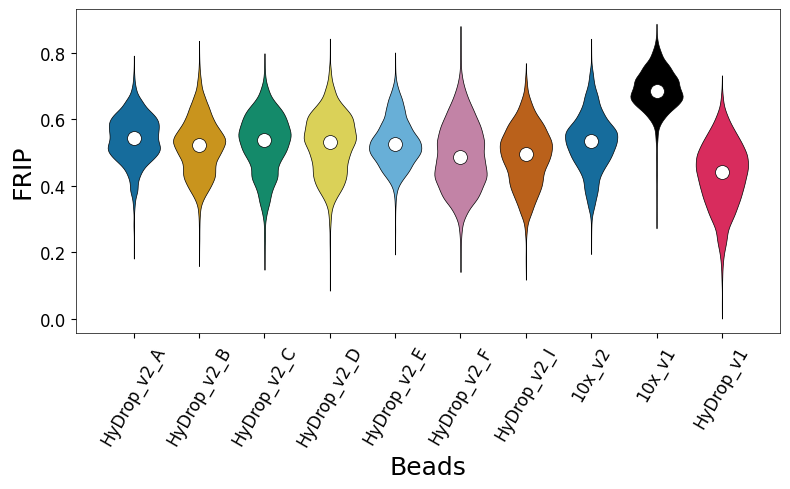

In [48]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Define the colors for each bead type.
bead_palette = {
    'HyDrop_v2_A': '#0072B2',
    'HyDrop_v2_B': '#E69F00',
    'HyDrop_v2_C': '#009E73', 
    'HyDrop_v2_D': '#F0E442',
    'HyDrop_v2_E': '#56B4E9',
    'HyDrop_v2_F': '#CC79A7', 
    'HyDrop_v2_I': '#D55E00',
    "10x_v2": "#0072B2",
    "10x_v1": "#000000",
    "HyDrop_v1": "#F50F51",
    # "10x_multiome_v1": "#84BC3D",
}

# Ensure the order of beads is given by the keys of bead_palette.
sample_order = list(bead_palette.keys())

# Merge sample_means into the cell_data DataFrame (if needed).
cistopic_obj.cell_data = cistopic_obj.cell_data.merge(sample_means, on='sample_id', how='left')

# Create the violin plot with the specified order, custom colors, and linewidth for the violins.
plt.figure(figsize=(8, 5))
ax = sns.violinplot(x='beads', y='FRIP', data=cistopic_obj.cell_data,
                    inner=None, order=sample_order, palette=bead_palette,
                    linewidth=0.5)

# Calculate the median FRIP for each bead group.
medians = cistopic_obj.cell_data.groupby('beads')['FRIP'].median()

# Overlay a white dot with a black edge (with linewidth 0.5) for each median.
for i, bead in enumerate(sample_order):
    median_val = medians[bead]
    plt.scatter(i, median_val, color='white', edgecolor='black', s=100, zorder=10, linewidths=0.5)

# Set axes labels and tick parameters.
plt.xlabel('Beads', fontsize=18)
plt.ylabel('FRIP', fontsize=18)
plt.xticks(rotation=60, fontsize=12)
plt.yticks(fontsize=12)

# Set the border (spine) linewidth to 0.5.
for spine in ax.spines.values():
    spine.set_linewidth(0.5)

plt.tight_layout()
plt.savefig("FRIP_tech_bead_color_mean.pdf", dpi=500, bbox_inches="tight")
plt.show()


/tmp/ipykernel_1017248/4007233128.py:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.violinplot(x='beads', y='Log_unique_nr_frag', data=cistopic_obj.cell_data,


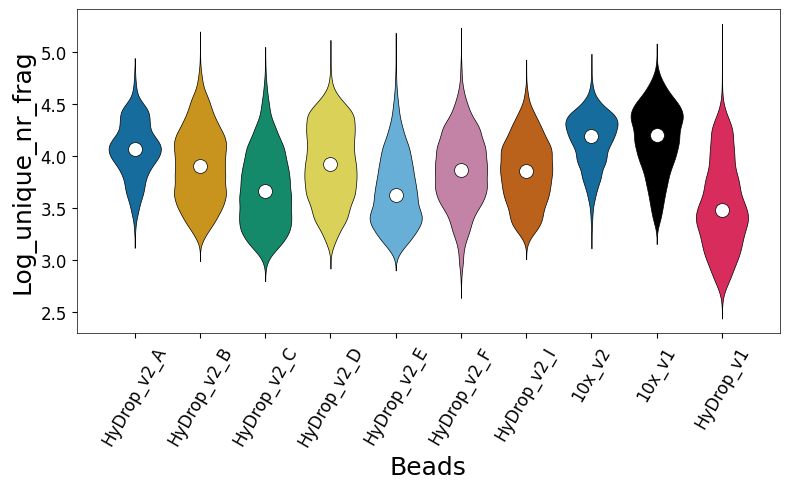

In [51]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Define the colors for each bead type.
bead_palette = {
    'HyDrop_v2_A': '#0072B2',
    'HyDrop_v2_B': '#E69F00',
    'HyDrop_v2_C': '#009E73', 
    'HyDrop_v2_D': '#F0E442',
    'HyDrop_v2_E': '#56B4E9',
    'HyDrop_v2_F': '#CC79A7', 
    'HyDrop_v2_I': '#D55E00',
    "10x_v2": "#0072B2",
    "10x_v1": "#000000",
    "HyDrop_v1": "#F50F51",
    # "10x_multiome_v1": "#84BC3D",
}

# Ensure the order of beads is given by the keys of bead_palette.
sample_order = list(bead_palette.keys())

# Merge sample_means into the cell_data DataFrame (if needed).
cistopic_obj.cell_data = cistopic_obj.cell_data.merge(sample_means, on='sample_id', how='left')

# Create the violin plot with the specified order, custom colors, and linewidth for the violins.
plt.figure(figsize=(8, 5))
ax = sns.violinplot(x='beads', y='Log_unique_nr_frag', data=cistopic_obj.cell_data,
                    inner=None, order=sample_order, palette=bead_palette,
                    linewidth=0.5)

# Calculate the median FRIP for each bead group.
medians = cistopic_obj.cell_data.groupby('beads')['Log_unique_nr_frag'].median()

# Overlay a white dot with a black edge (with linewidth 0.5) for each median.
for i, bead in enumerate(sample_order):
    median_val = medians[bead]
    plt.scatter(i, median_val, color='white', edgecolor='black', s=100, zorder=10, linewidths=0.5)

# Set axes labels and tick parameters.
plt.xlabel('Beads', fontsize=18)
plt.ylabel('Log_unique_nr_frag', fontsize=18)
plt.xticks(rotation=60, fontsize=12)
plt.yticks(fontsize=12)
#plt.ylim(0,50000)

# Set the border (spine) linewidth to 0.5.
for spine in ax.spines.values():
    spine.set_linewidth(0.5)

plt.tight_layout()
plt.savefig("Log_unique_nr_frag_tech_bead_color_mean.svg", dpi=500, bbox_inches="tight")
plt.show()

In [11]:
import matplotlib as mpl
mpl.rcParams['pdf.fonttype'] = 42